In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
%matplotlib inline
%matplotlib notebook

In [2]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def R2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)

def MSE(y, y_hat):
    return np.mean(np.square(y - y_hat))

def z_score(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Create data
x0 = np.arange(0, 1, 0.01)
y0 = np.arange(0, 1, 0.01)

x0, y0 = np.meshgrid(x0,y0)

x = x0.reshape(-1, 1)
y = y0.reshape(-1, 1)
feature00 = np.ones(len(x))
feature0 = feature00.reshape(-1, 1)


# Compute z
z = FrankeFunction(x, y)

# Scaling data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

scaler.fit(y)
y_scaled = scaler.transform(y)

scaler.fit(x**2)
x2_scaled = scaler.transform(x**2)

scaler.fit(y**2)
y2_scaled = scaler.transform(y**2)

scaler.fit(x*y)
xy_scaled = scaler.transform(x*y)

scaler.fit(x**3)
x3_scaled = scaler.transform(x**3)

scaler.fit(y**3)
y3_scaled = scaler.transform(y**3)

scaler.fit((x*y)**2)
x2y2_scaled = scaler.transform((x*y)**2)

scaler.fit(x**4)
x4_scaled = scaler.transform(x**4)
                             
scaler.fit(y**4)
y4_scaled = scaler.transform(y**4)

scaler.fit((x*y)**3)
x3y3_scaled = scaler.transform((x*y)**3)

scaler.fit(x**5)
x5_scaled = scaler.transform(x**5)

scaler.fit(y**5)
y5_scaled = scaler.transform(y**5)

scaler.fit((x*y)**4)
x4y4_scaled = scaler.transform((x*y)**4)

# Get labels
labels = z.ravel()

# Create the matrix of features
d = [1, 2, 3, 4, 5]

features_1d = np.stack([feature0.ravel(), x_scaled.ravel(), y_scaled.ravel()], axis=1)
x_train_1d, x_test_1d, y_train_1d, y_test_1d = train_test_split(features_1d, labels, test_size=0.2, random_state=100)

features_2d = np.stack([feature0.ravel(), x_scaled.ravel(), y_scaled.ravel(), x2_scaled.ravel(), y2_scaled.ravel(), xy_scaled.ravel()], axis=1)
x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(features_2d, labels, test_size=0.2, random_state=100)

features_3d = np.stack([feature0.ravel(), x_scaled.ravel(), y_scaled.ravel(), x2_scaled.ravel(), y2_scaled.ravel(), xy_scaled.ravel(), x3_scaled.ravel(), y3_scaled.ravel(), x2y2_scaled.ravel()], axis=1)
x_train_3d, x_test_3d, y_train_3d, y_test_3d = train_test_split(features_3d, labels, test_size=0.2, random_state=100)

features_4d = np.stack([feature0.ravel(), x_scaled.ravel(), y_scaled.ravel(), x2_scaled.ravel(), y2_scaled.ravel(), xy_scaled.ravel(), x3_scaled.ravel(), y3_scaled.ravel(), x2y2_scaled.ravel(), x4_scaled.ravel(), y4_scaled.ravel(), x3y3_scaled.ravel()], axis=1)
x_train_4d, x_test_4d, y_train_4d, y_test_4d = train_test_split(features_4d, labels, test_size=0.2, random_state=100)

features_5d = np.stack([feature0.ravel(), x_scaled.ravel(), y_scaled.ravel(), x2_scaled.ravel(), y2_scaled.ravel(), xy_scaled.ravel(), x3_scaled.ravel(), y3_scaled.ravel(), x2y2_scaled.ravel(), x4_scaled.ravel(), y4_scaled.ravel(), x3y3_scaled.ravel(), x5_scaled.ravel(), y5_scaled.ravel(), x4y4_scaled.ravel()], axis=1)
x_train_5d, x_test_5d, y_train_5d, y_test_5d = train_test_split(features_5d, labels, test_size=0.2, random_state=100)

In [3]:
Lambda = 0.000001

# Determine optimal parameters

beta_r1=(np.linalg.inv((x_train_1d.T).dot(x_train_1d) + Lambda * np.identity(x_train_1d.shape[1]))).dot(x_train_1d.T).dot(y_train_1d)
beta_r2=(np.linalg.inv((x_train_2d.T).dot(x_train_2d) + Lambda * np.identity(x_train_2d.shape[1]))).dot(x_train_2d.T).dot(y_train_2d)
beta_r3=(np.linalg.inv((x_train_3d.T).dot(x_train_3d) + Lambda * np.identity(x_train_3d.shape[1]))).dot(x_train_3d.T).dot(y_train_3d)
beta_r4=(np.linalg.inv((x_train_4d.T).dot(x_train_4d) + Lambda * np.identity(x_train_4d.shape[1]))).dot(x_train_4d.T).dot(y_train_4d)
beta_r5=(np.linalg.inv((x_train_5d.T).dot(x_train_5d) + Lambda * np.identity(x_train_5d.shape[1]))).dot(x_train_5d.T).dot(y_train_5d)


# Ridge_Y_prediction
#def Y_Tilda1(x_train_1d,beta_r1):
Y_Tilda1 = x_train_1d @ beta_r1
#def Y_Tilda2(x_train_2d,beta_r2):
Y_Tilda2 = x_train_2d @beta_r2 
#def Y_Tilda3(x_train_3d,beta_r3):
Y_Tilda3 = x_train_3d @beta_r3 
#def Y_Tilda4(x_train_4d,beta_r4):
Y_Tilda4 = x_train_4d @beta_r4 
#def Y_Tilda5(x_train_5d,beta_r5):
Y_Tilda5 = x_train_5d @beta_r5 


(3,) (8000, 3)


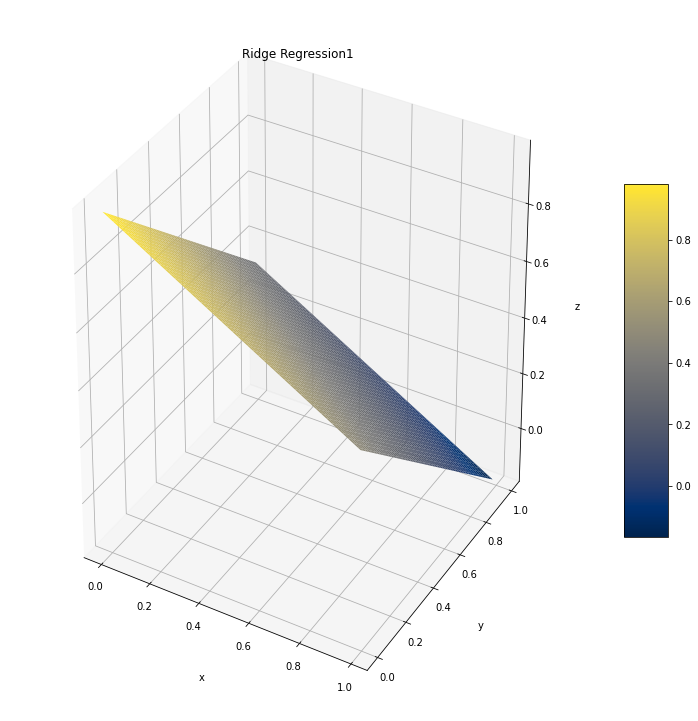

In [17]:
fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection='3d')

Y_hat1D = features_1d @ beta_r1


surf = ax.plot_surface(x0, y0, Y_hat1D.reshape(x0.shape), cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)
ax.set_title('Ridge Regression1')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()